In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Import Dependencies

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
#Synthetic Minority Over-sampling Technique (SMOTE) is a machine learning algorithm used to balance imbalanced datasets by generating synthetic samples for the minority class, rather than duplicating them
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Read  Data

In [78]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
pd.set_option("display.max_columns",None)

In [80]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


check shape

In [81]:
df.shape

(7043, 21)

In [82]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

visualizing the churns

[Text(0, 0, '5174'), Text(0, 0, '1869')]

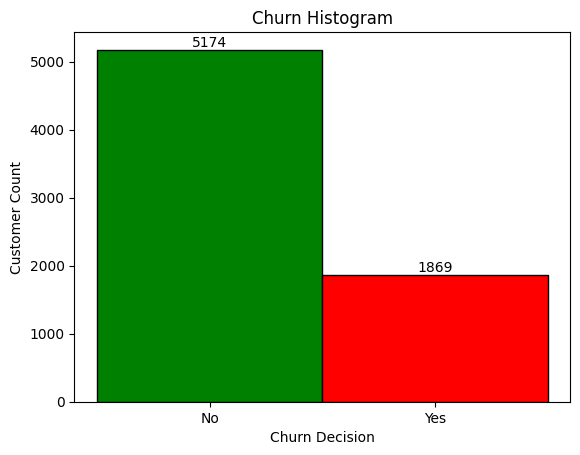

In [83]:
count, bin, patch = plt.hist(df['Churn'],bins=[-0.5,0.5,1.5],edgecolor='black')
patch[0].set_facecolor('green')
patch[1].set_facecolor('red')
plt.title('Churn Histogram')
plt.xlabel('Churn Decision')
plt.ylabel('Customer Count')
plt.bar_label(patch)

The datapoints are skewed towards No

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
len(df['customerID'].unique())

7043

In [86]:
df.drop('customerID',axis=1,inplace=True)

In [92]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

Empty values as float 

In [97]:
df['TotalCharges'].replace({' ':0},inplace=True)

In [98]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [87]:
for col in df.columns:
    print(col, df[col].unique())
    print('*'*50)

gender ['Female' 'Male']
**************************************************
SeniorCitizen [0 1]
**************************************************
Partner ['Yes' 'No']
**************************************************
Dependents ['No' 'Yes']
**************************************************
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
**************************************************
PhoneService ['No' 'Yes']
**************************************************
MultipleLines ['No phone service' 'No' 'Yes']
**************************************************
InternetService ['DSL' 'Fiber optic' 'No']
**************************************************
OnlineSecurity ['No' 'Yes' 'No internet service']
**************************************************
OnlineBackup ['Yes' 'No' 'No internet service']
*******

# EDA

Numerical Data Analysis

In [162]:
def plot_graph(df,col,colr):
    plt.figure(figsize=(5,3))
    sns.histplot(df[col],kde=True,color=colr)
    plt.title(f'Distribution of {col}')
    col_mean = df[col].mean()
    col_median = df[col].median()
    plt.axvline(col_mean,color="red",linestyle='--',label="Mean")
    plt.axvline(col_median,color="green",linestyle='--',label="Mode")
    plt.legend()
    plt.show()

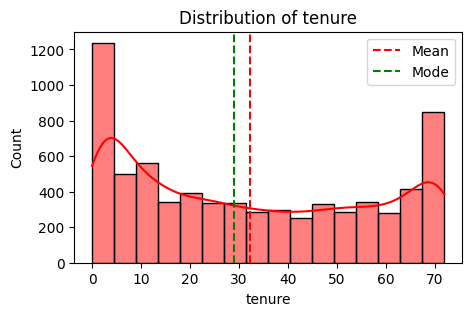

In [163]:
plot_graph(df,'tenure','red')

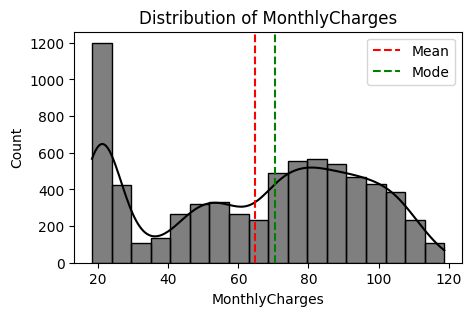

In [138]:
plot_graph(df,'MonthlyCharges','black')

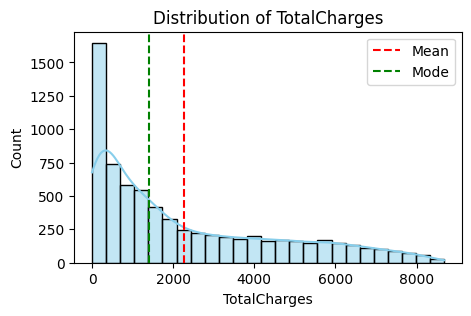

In [139]:
plot_graph(df,'TotalCharges','skyblue') #skewed

<Axes: ylabel='tenure'>

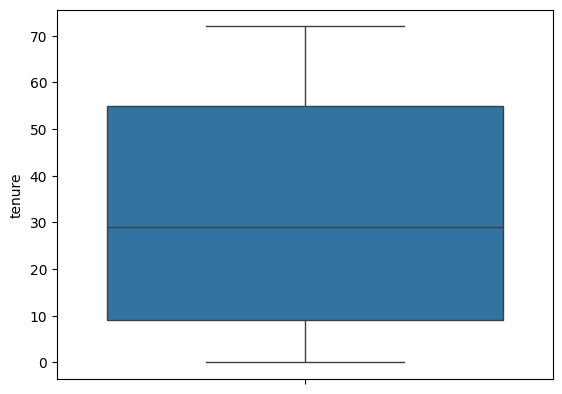

In [164]:
sns.boxplot(df['tenure'])

<Axes: >

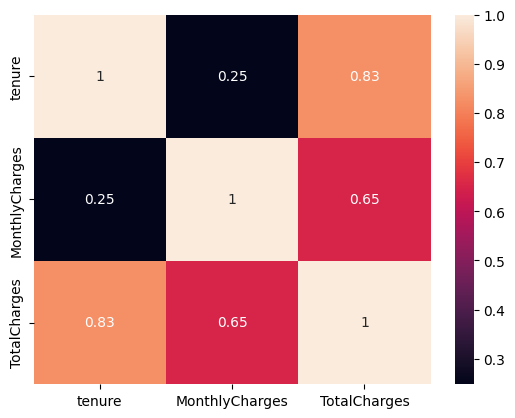

In [174]:
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True)

In [175]:
#since total charges is correlated to tenure and somewhat to Monthly Charges, we drop it 
df.drop('TotalCharges',axis=1,inplace=True)

<Axes: >

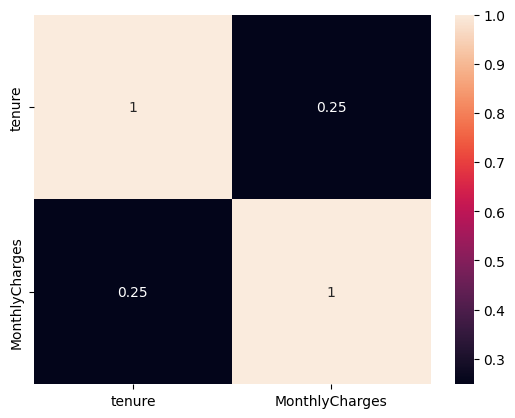

In [177]:
sns.heatmap(df[['tenure','MonthlyCharges']].corr(), annot=True)

Categorical Analysis

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [179]:
df_cat = df.select_dtypes('object').columns.to_list()

In [182]:
df_cat.append('SeniorCitizen') # all categorical columns


In [183]:
df_cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [211]:
def count_graph(df,col,colr):
    plt.figure(figsize=(10,8))
    sns.countplot(x=df[col],color=colr)
    plt.title(f'Distribution of {col}')
    plt.show()

In [212]:
import random
color=['red','pink','blue','yellow','green','skyblue','black']

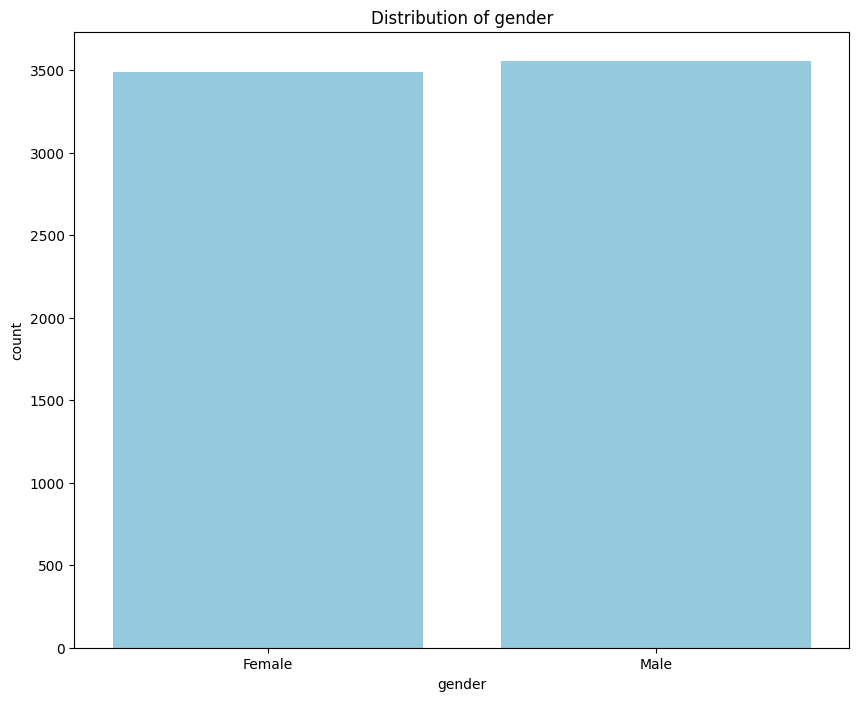

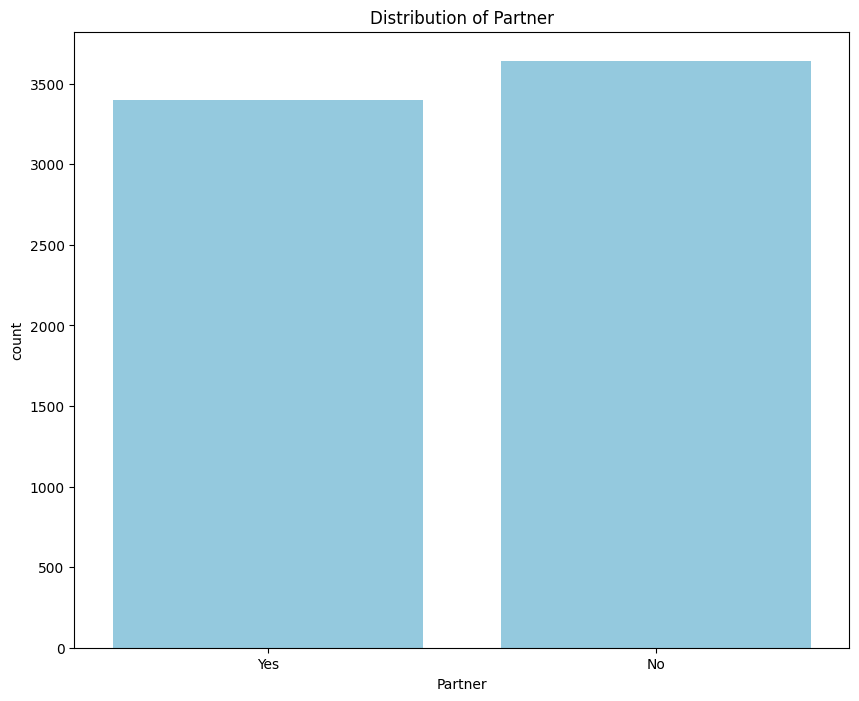

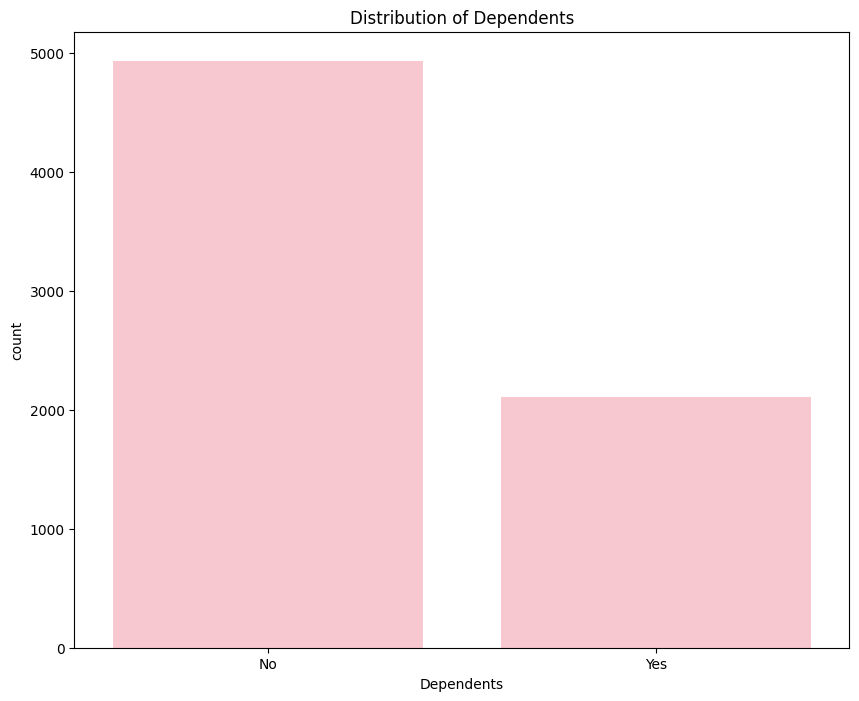

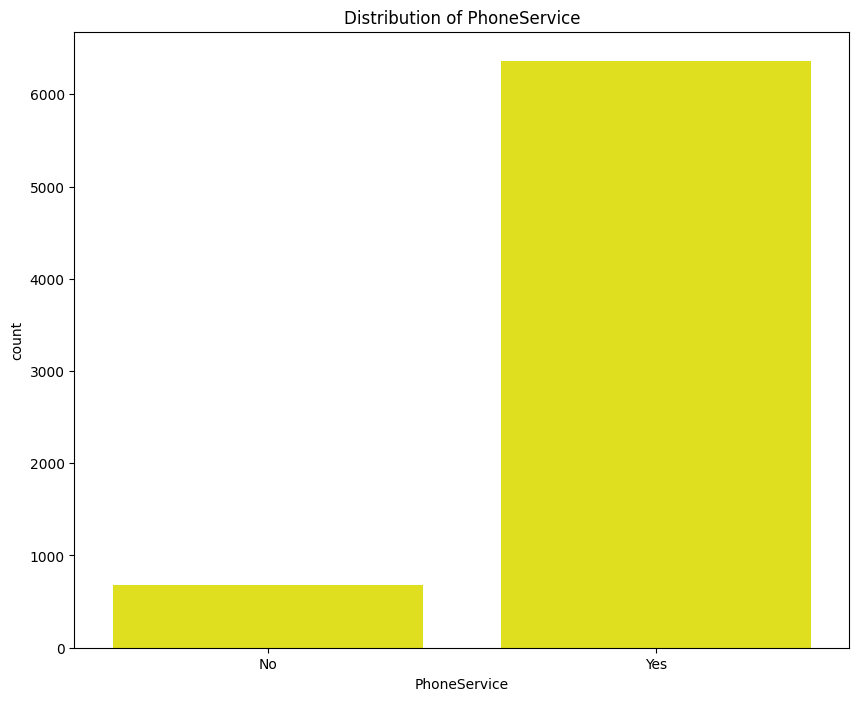

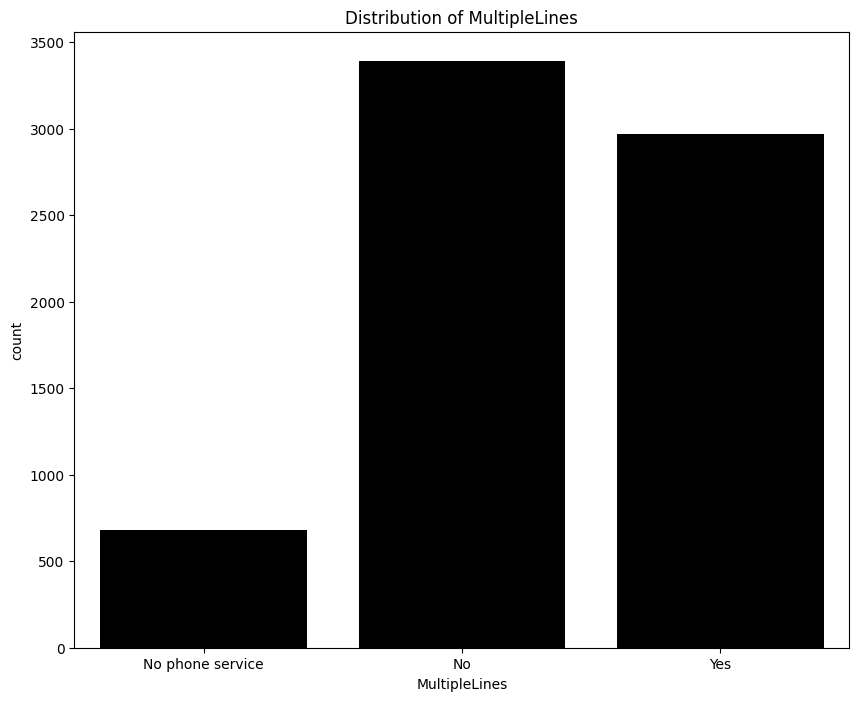

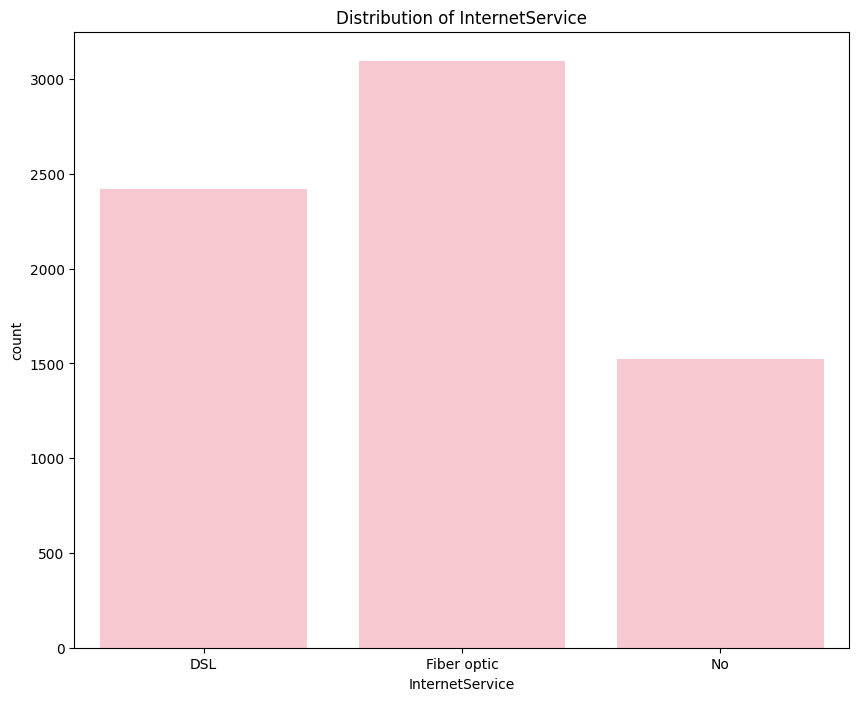

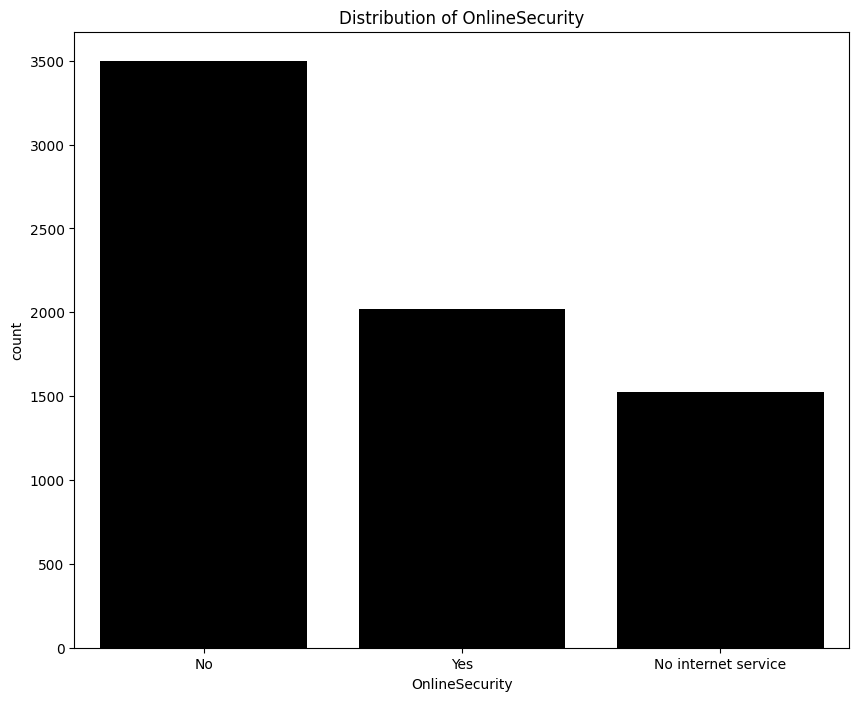

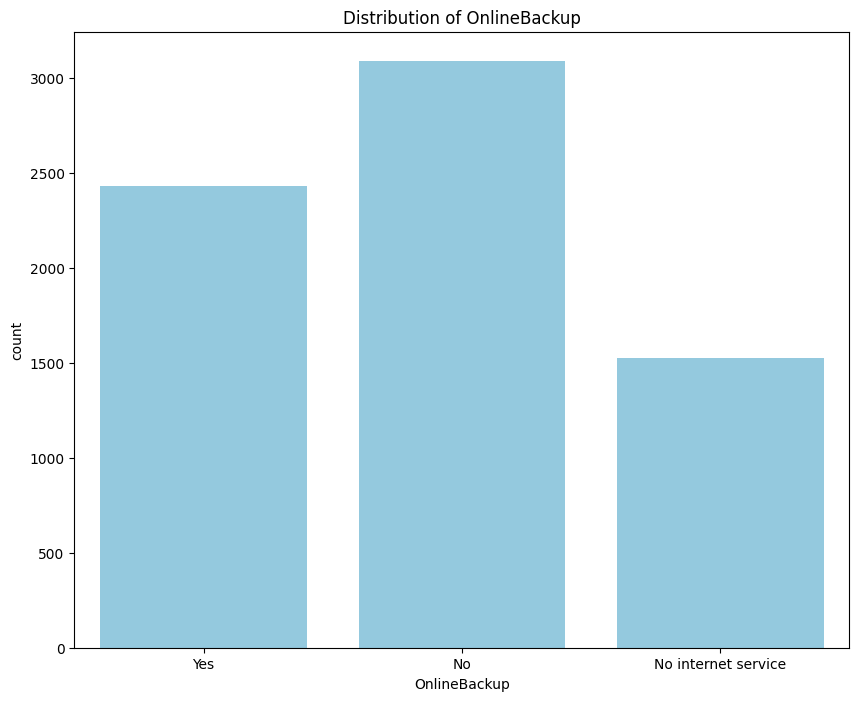

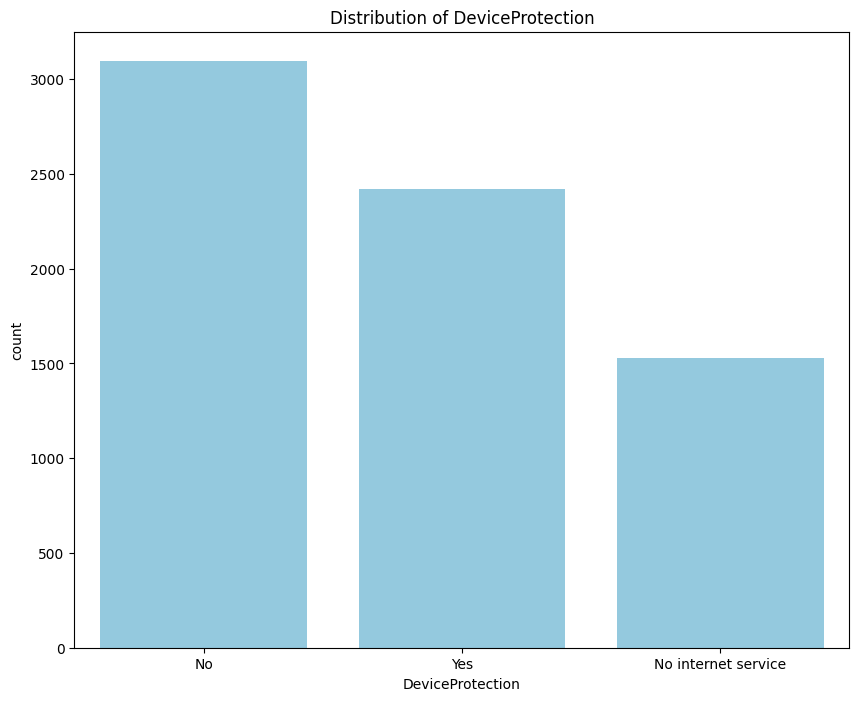

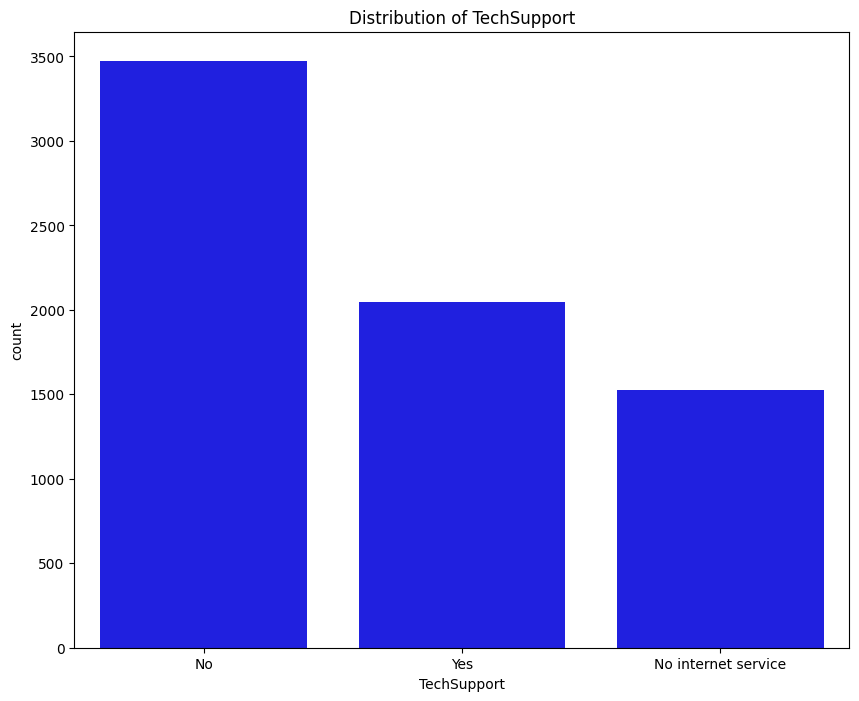

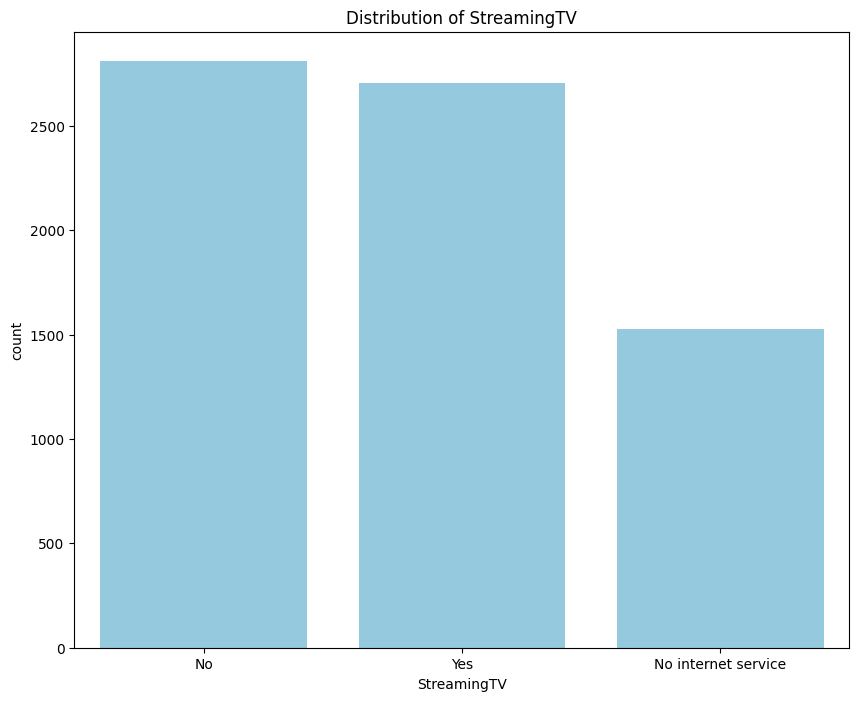

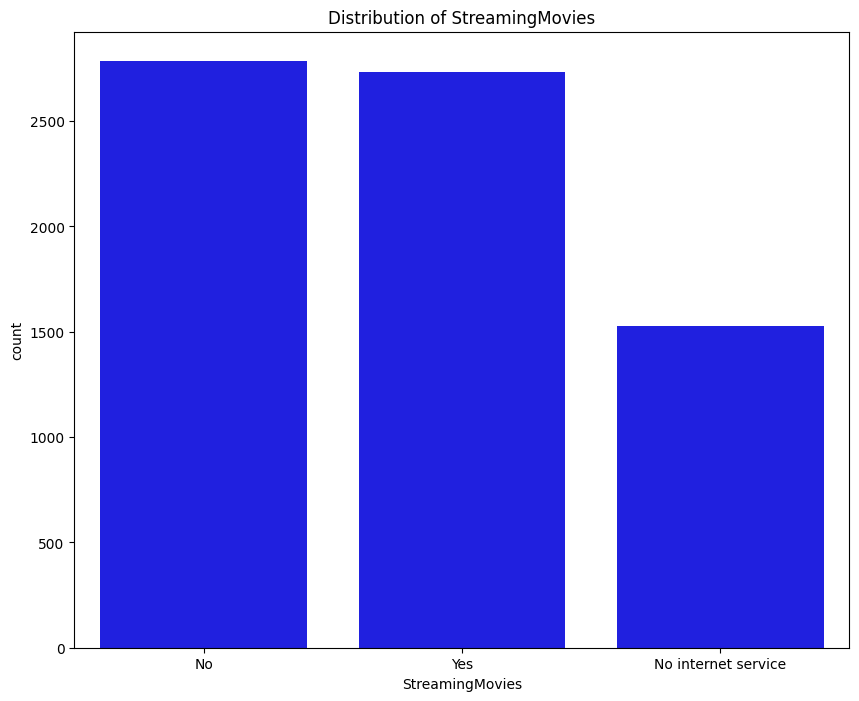

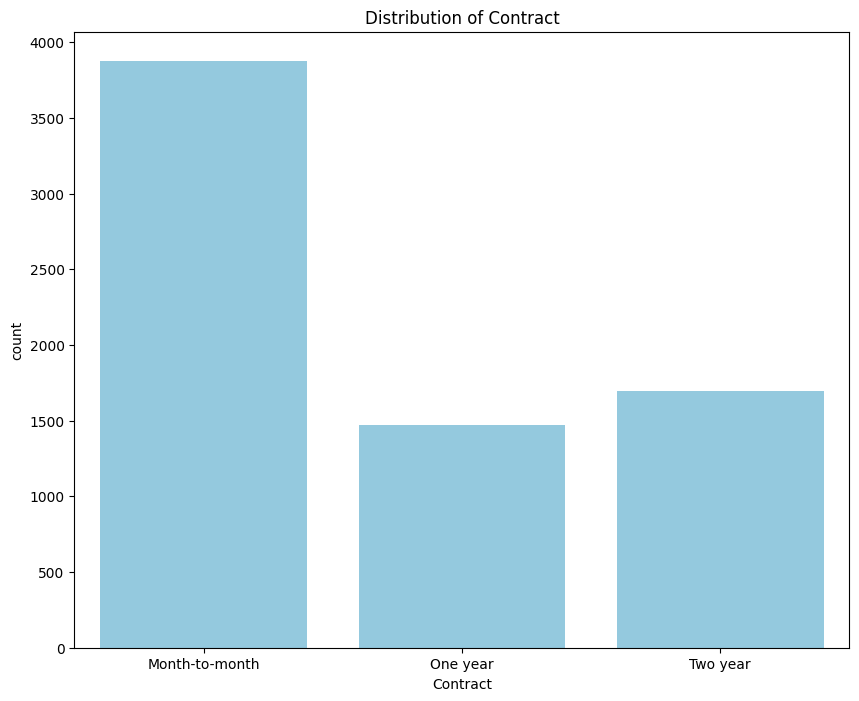

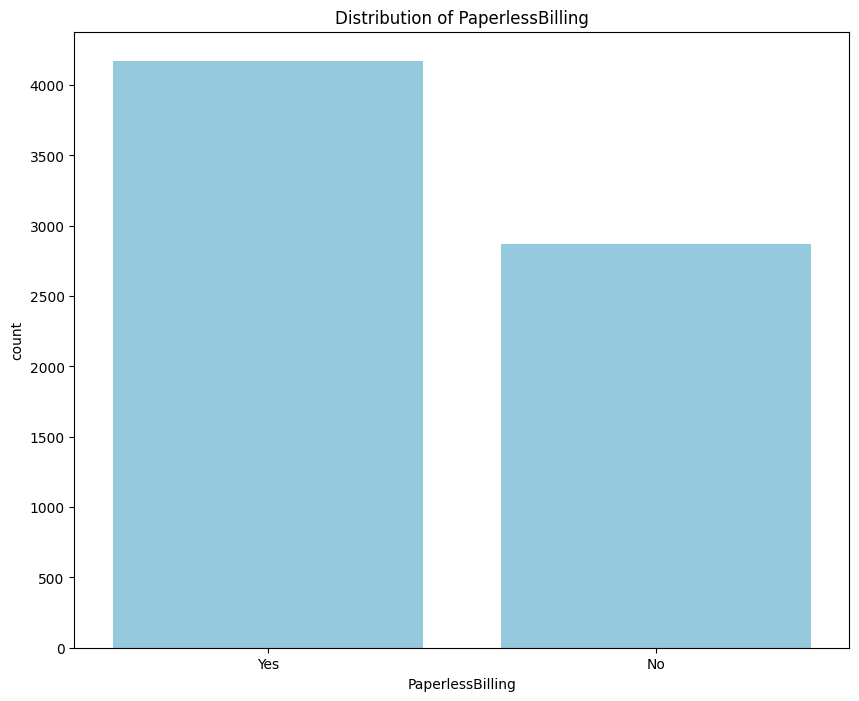

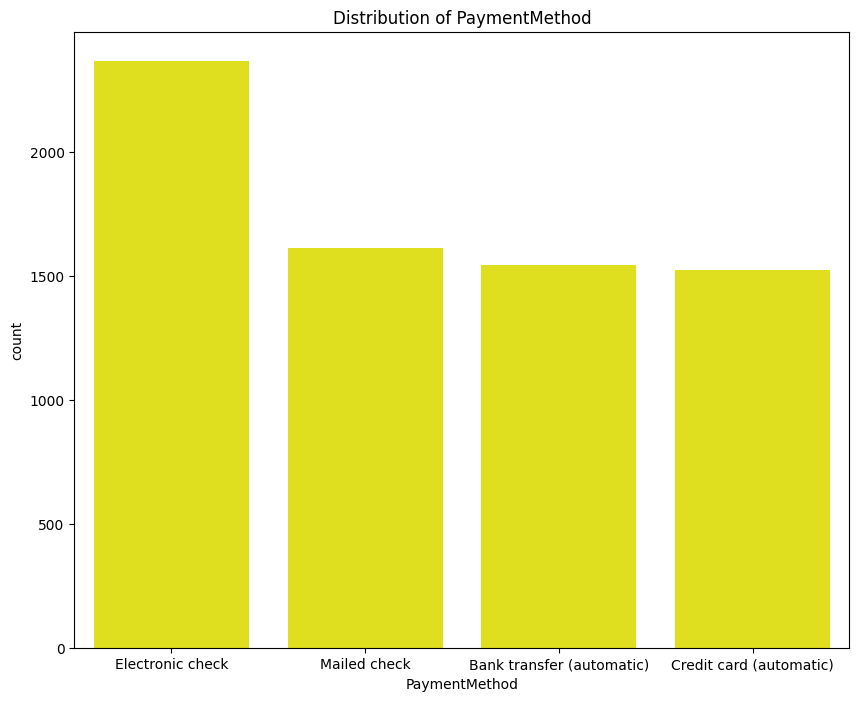

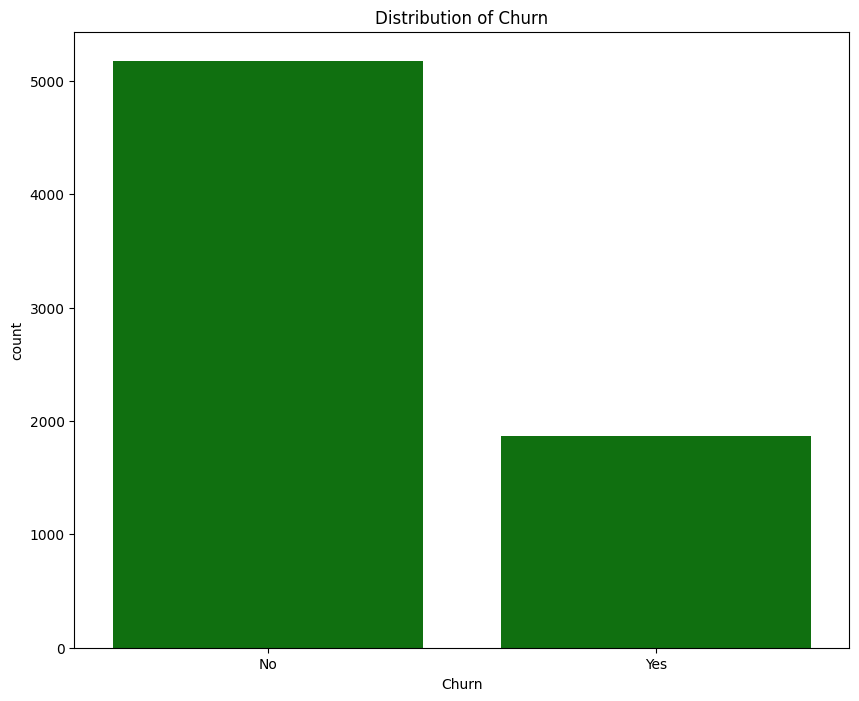

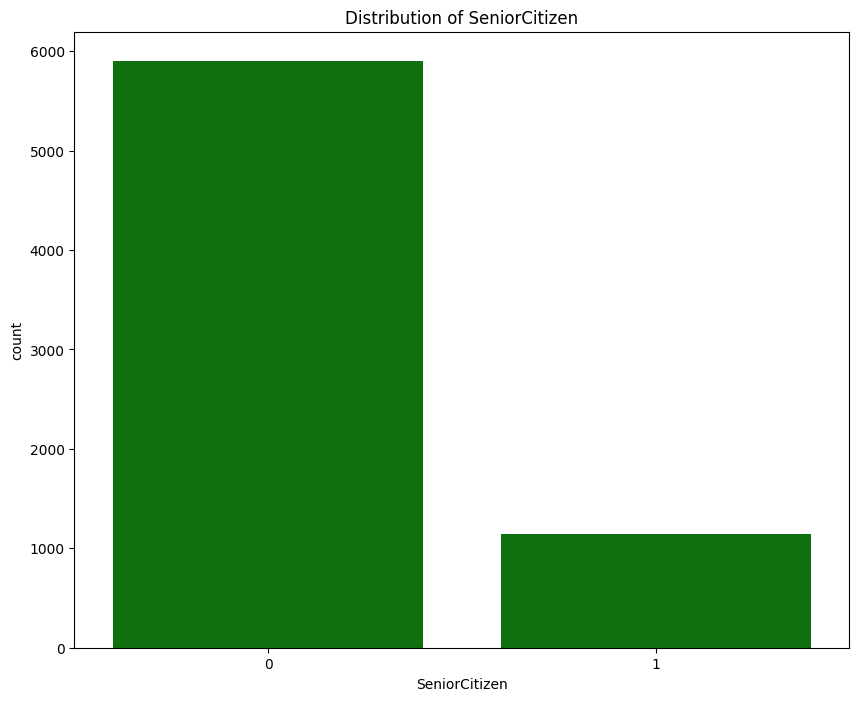

In [213]:
for col in df_cat:
    c = random.choice(color)
    count_graph(df,col,c)

# Preprocessing

In [214]:
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

Label Encoding needed

In [221]:
df_cat = df.select_dtypes('object').columns.to_list()

In [222]:
df_cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

Dict to save encoders - Later to pickle file

In [224]:
import pickle
encoders = {}
for col in df_cat:
    lenc = LabelEncoder()
    df[col] = lenc.fit_transform(df[col])
    encoders[col] = lenc

with open("encoder.pkl","wb") as f:
    pickle.dump(encoders,f)

In [225]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [226]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


Handling Imbalance with SMOT

In [237]:
X , y = df.iloc[:,:-1], df['Churn']

<Axes: >

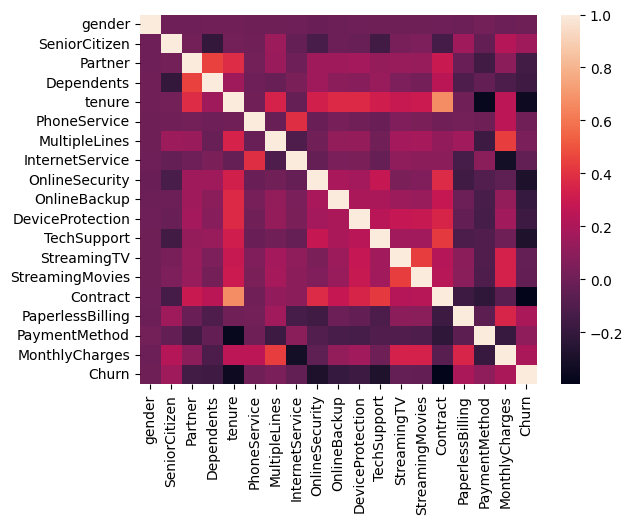

In [242]:
sns.heatmap(df.corr())

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [245]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

SMOT

In [246]:
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [247]:
y_train.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

# Training Model

In [254]:
models = { 'decision tree': DecisionTreeClassifier(random_state=42) ,
             'random forest': RandomForestClassifier(n_estimators=1000, random_state=42),
                'xg boost': XGBClassifier(random_state=42)}
cv_scores = {}

In [258]:
for model_name, mod in models.items():
    print(f'{model_name} training going on')
    cv = cross_val_score(mod,X_train,y_train,cv=5,scoring='accuracy')
    cv_scores[model_name] = cv
    print(f'Score = {cv.mean():.2f}')
    print('*'*50)

decision tree training going on
Score = 0.79
**************************************************
random forest training going on
Score = 0.84
**************************************************
xg boost training going on
Score = 0.83
**************************************************


In [260]:
cv_scores

{'decision tree': array([0.71497585, 0.73413897, 0.82416918, 0.82960725, 0.83927492]),
 'random forest': array([0.75905797, 0.78670695, 0.87673716, 0.88640483, 0.88640483]),
 'xg boost': array([0.73852657, 0.78126888, 0.88821752, 0.87854985, 0.88700906])}

We choose Random Forest Classifier

In [261]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [262]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [263]:
accuracy_score(y_pred,y_test)

0.772888573456352

In [264]:
confusion_matrix(y_pred,y_test)

array([[869, 153],
       [167, 220]])

In [266]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1022
           1       0.59      0.57      0.58       387

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



In [267]:
#save training model as a pickle file 
with open("customer_churn_model.pkl","wb") as f:
    pickle.dump(model,f)

In [268]:
model_data = {'model':model, "features":X.columns.to_list()}

In [269]:
with open("model_data.pkl","wb") as f:
    pickle.dump(model_data,f)

# Predict Anything with the pkl files!

In [272]:
with open("model_data.pkl","rb") as f:
    m = pickle.load(f)

model1 = m['model']
feature_names = m['features']

In [273]:
with open("encoder.pkl","rb") as f:
    m = pickle.load(f)

encoder_list = m

In [274]:
encoder_list

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

Now you can use these in local to predict churn values

In [281]:
new_df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [283]:
input = new_df.sample()

In [288]:
input #1799

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1799,9172-ANCRX,Female,0,No,No,10,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.7,973.25,Yes


In [290]:
for col, enc in encoder_list.items():
    input[col] = enc.fit_transform(input[col])

In [291]:
input

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1799,9172-ANCRX,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,98.7,973.25,Yes


In [298]:
input = input[[i for i in input.columns if i in feature_names]]

In [299]:
input


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1799,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,98.7


In [300]:
model1.predict(input) #means yes same as initial churn

array([1])

In [304]:
model1.predict_proba(input) #90% probability that the person will leave

array([[0.1, 0.9]])